### Airlines & Airports Datasets

Here, we run initialization code, define python imports and load all csv files.

In [2]:
import os 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt
from IPython.display import display_html
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
%matplotlib inline

In [3]:
# Ensuring all columns are showed
pd.set_option('display.max_columns', 500)
# Ensuring the view is optimised by showing the 2 dataframes side by side
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline; margin-right:15px;"'), raw=True)
    
# Ensuring all floats included, and calculated such as mean median and other numbers would 
# return a float that's easy to understand, not in scientific notation.
pd.set_option('display.float_format', lambda x: '%.1f' % x)

base_data_dir_path = "data"

airlines_file_path = base_data_dir_path + "/airlines.csv"
airports_file_path = base_data_dir_path + "/airports.csv"
flights_file_path = base_data_dir_path + "/flights.csv"

# loading all CSV files (they're original csv files that shouldn't be modified)
_airlines_csv = pd.read_csv(airlines_file_path)
_airports_csv = pd.read_csv(airports_file_path)

# USE THIS WHEN CHANGING TO LOCAL TO AVOID DTYPE ERROR
# _flights_csv = pd.read_csv('../data/flights.csv', dtype={'ORIGIN_AIRPORT' : str, 'DESTINATION_AIRPORT' : str}, engine='python')
_flights_csv = pd.read_csv(flights_file_path, dtype={'ORIGIN_AIRPORT' : str, 'DESTINATION_AIRPORT' : str}, engine='python')

In [4]:
display_side_by_side(_airlines_csv.head(10),_airports_csv.head(10))

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


### Main Flights Dataset
-----
The main dataset contains 31 columns and 469,968 rows of data in total. The analysis code has been applied to get an understanding of the quality and completeness of the data. Columns with a high percentage of nulls were dropped from the table as they are unreliable. The team has also studied the data types of all columns, and for the numerical values involved, an analysis has been performed on the mean, median, max and min values for a better understanding of the data. A search on what column represents has also been conducted to help understand the dataset.

In [5]:
#Loading the Airlines DF & displaying first 10 rows
_flights_csv.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,nan,nan,nan,nan,nan
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,nan,nan,nan,nan,nan
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,nan,nan,nan,nan,nan
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,nan,nan,nan,nan,nan
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,nan,nan,nan,nan,nan
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,NaN,nan,nan,nan,nan,nan
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0,NaN,nan,nan,nan,nan,nan
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0,NaN,nan,nan,nan,nan,nan
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,NaN,nan,nan,nan,nan,nan
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0,0,0,NaN,nan,nan,nan,nan,nan


### Data Fields Key properties:
 * __YEAR, MONTH, DAY:__ Year (2015 for all records), Month (January, February and March only inculded) and Day (1-31).
 * __DAY_OF_WEEK:__ Range of integers (1-7) inclusive, representing (Monday to Sunday).
 * __AIRLINE, FLIGHT_NUMBER, TAIL_NUMBER:__ Identifiers of airlines (IATA codes to be translated from Airlines dataset), flights and aircrafts.
 * __ORIGIN_AIRPORT, DESTINATION_AIRPORT:__ Identifiers of start and destination airports (IATA codes to be translated from Airports dataset).
 * __SCHEDULED_DEPARTURE, DEPARTURE_TIME, DEPARTURE_DELAY, TAXI_OUT, WHEELS_OFF:__ Departure/Pre-Trip data, from planned time in hours & minutes, actual departure time (WHEEL_OFF - TAXI_OUT) , delay (actual time - planned time), the time duration elapsed between departure from the origin airport gate and wheels off, and finally, the time point that the aircratf's wheels leave the ground, consecutively.
 * __SCHEDULED_TIME, ELAPSED_TIME, AIR_TIME, DISTANCE:__ Trip execution data, from planned time needed for the flight trip in mins, the actual elapsed time (AIR_TIME + TAXI_IN + TAXI_OUT) in mins, air_time (The time duration between wheels_off and wheels_on time) in mins and distance between the two airports in miles.
 * __WHEELS_ON, TAXI_IN, SCHEDULED_ARRIVAL, ARRIVAL_TIME, ARRIVAL_DELAY:__ Arrival data, from the time point that the aircraft's wheels touch on the ground, the time duration elapsed between wheels-on and gate arrival at the destination airport, planned arrival time, actual arrival time and arrival_delay (actual time - planned time).
 * __DIVERTED, CANCELLED, CANCELLATION_REASON, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY:__ Post-trip data on whether or not the flight was cancelled or landed on an airport out of schedule, both represented as binary values of 0 for false and 1 for true. Only for fligths where cancellation is 1 (true), a reason for cancellation is included as a Letter, such that A - Airline/Carrier; B - Weather; C - National Air System; D - Security. It is evident that weather is the most common reason for cancellation. Finally, the dataset summarizes 5 types of causes of a delay, and number of minutes of delay in each category is given. Our analysis show that reasons of delays are quite unreliable becuase there are many cases where records are missing all columns despite having an arrival delay. There are also some records with mins ditributed between more than one specific cause.

In [6]:
#Counting rows and columns
_flights_csv.shape

(5819079, 31)

In [7]:
#Viewing names and datatypes of columns
_flights_csv.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [8]:
#Viewing data quality in important columns
print("ARRIVAL TIME:\n", _flights_csv['ARRIVAL_TIME'].describe(), "\n YEAR \n", _flights_csv['YEAR'].describe())

ARRIVAL TIME:
 count   5726566.0
mean       1476.5
std         526.3
min           1.0
25%        1059.0
50%        1512.0
75%        1917.0
max        2400.0
Name: ARRIVAL_TIME, dtype: float64 
 YEAR 
 count   5819079.0
mean       2015.0
std           0.0
min        2015.0
25%        2015.0
50%        2015.0
75%        2015.0
max        2015.0
Name: YEAR, dtype: float64


In [9]:
_flights_csv['AIRLINE'].describe()

count     5819079
unique         14
top            WN
freq      1261855
Name: AIRLINE, dtype: object

In [10]:
_flights_csv['CANCELLATION_REASON'].describe()

count     89884
unique        4
top           B
freq      48851
Name: CANCELLATION_REASON, dtype: object

In [11]:
#We actually find that some origin and destination airport codes are invalid.
#Our table is meant to have only 3-letter codes as per information in airports.csv.
#This means that, for simplicity's sake, all rows with numerical values here first need to be dropped.

missing_airports = _flights_csv[_flights_csv['ORIGIN_AIRPORT'].str.isnumeric()].index
_flights_csv.drop(missing_airports, inplace=True)

_flights_csv['ORIGIN_AIRPORT'].unique()

array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'MAF', 'DFW', 'MKE',
       'IAH', 'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'SGF', 'PHL', 'SBN',
       'RDD', 'EUG', 'IAD', 'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT',
       'SMF', 'AUS', 'MCI', 'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA',
       'SAT', 'CHS', 'SBA', 'SMX', 'IND', 'CLE', 'GSP', 'BDL', 'ABI',
       'RIC', 'BFL', 'OMA', 'RDM', 'FLL', 'CID', 'TPA', 'SYR', 'ROC',
       'TYR', 'LAN', 'XNA', 'GSO', 'EWR', 'PBI', 'RSW', 'OAK', 'PVD',
       'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'LGA', 'TUL', 'LIT', 'MSY',
       'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT', 'SAV', 'CLT', 'GRB',
       'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX', 'CWA', 'MSO', 'TTN',
       'AMA', 'CLL', 'HOU', 'JLN', 'MLI', 'RDU', 'CVG', 'MHK', 'MOB',
       'TLH', 'BHM', 'CAE', 'TXK', 'ACY', 'DTW', 'RAP', 'TUS', 'EAU',
       'DLH', 'FSD',

In [12]:
#Double-checking Destination Airports also don't have numeric values
_flights_csv['DESTINATION_AIRPORT'].unique()

array(['SEA', 'PBI', 'CLT', 'MIA', 'ANC', 'MSP', 'DFW', 'ATL', 'IAH',
       'PDX', 'MCI', 'FLL', 'ORD', 'HNL', 'PHX', 'EWR', 'JFK', 'MCO',
       'BOS', 'BDL', 'ITO', 'SFO', 'KOA', 'OGG', 'MYR', 'DTW', 'LIH',
       'DEN', 'SJU', 'LAX', 'BWI', 'IAD', 'BQN', 'BUF', 'LGA', 'HOU',
       'SLC', 'PHL', 'SJC', 'OAK', 'LGB', 'TPA', 'DCA', 'TTN', 'BTR',
       'LAS', 'RSW', 'BRD', 'STL', 'RKS', 'MBS', 'SNA', 'MEI', 'MDW',
       'SAN', 'RIC', 'AUS', 'OTZ', 'PIT', 'JAX', 'MSY', 'ONT', 'PSP',
       'BUR', 'DAL', 'CVG', 'SMF', 'RDU', 'JMS', 'BNA', 'DSM', 'MAF',
       'BOI', 'ELP', 'TUS', 'SCC', 'HPN', 'STT', 'MDT', 'RHI', 'SBP',
       'MKE', 'JNU', 'CMH', 'CLD', 'KTN', 'CAK', 'CRP', 'CLE', 'GPT',
       'SHV', 'TYS', 'IND', 'LIT', 'SAT', 'SRQ', 'TUL', 'GRK', 'PNS',
       'BTV', 'CHS', 'DAY', 'OKC', 'SAV', 'XNA', 'COS', 'GJT', 'BZN',
       'PUB', 'HRL', 'HDN', 'MEM', 'GEG', 'ORH', 'SYR', 'GSO', 'VPS',
       'LAW', 'ACY', 'LBB', 'JAC', 'BIL', 'EUG', 'ASE', 'TVC', 'MTJ',
       'CAE', 'PVD',

In [13]:
#We need to drop some columns which we know from the get-go will be irrelevant to our testing.
#These include:
#FLIGHT_NUMBER; TAIL_NUMBER; CANCELLATION_REASON; WHEELS_ON; WHEELS_OFF; TAXI_IN; TAXI_OUT;

print(f"Before drop: {_flights_csv.columns}")
_flights_csv.drop(['FLIGHT_NUMBER', 
                   'TAIL_NUMBER', 
                   'CANCELLATION_REASON', 
                   'WHEELS_ON',
                   'WHEELS_OFF',
                   'TAXI_IN',
                   'TAXI_OUT'], axis=1, inplace=True, errors='ignore')
print(f"After drop: {_flights_csv.columns}")

Before drop: Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')
After drop: Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 

In [14]:
#Before we start dropping other tables, let's check how many values are null as a percentage of each column
_flights_csv.isnull().sum() / _flights_csv.shape[0] * 100

YEAR                   0.0
MONTH                  0.0
DAY                    0.0
DAY_OF_WEEK            0.0
AIRLINE                0.0
ORIGIN_AIRPORT         0.0
DESTINATION_AIRPORT    0.0
SCHEDULED_DEPARTURE    0.0
DEPARTURE_TIME         1.6
DEPARTURE_DELAY        1.6
SCHEDULED_TIME         0.0
ELAPSED_TIME           1.9
AIR_TIME               1.9
DISTANCE               0.0
SCHEDULED_ARRIVAL      0.0
ARRIVAL_TIME           1.7
ARRIVAL_DELAY          1.9
DIVERTED               0.0
CANCELLED              0.0
AIR_SYSTEM_DELAY      81.2
SECURITY_DELAY        81.2
AIRLINE_DELAY         81.2
LATE_AIRCRAFT_DELAY   81.2
WEATHER_DELAY         81.2
dtype: float64

In [15]:
#We need to drop flights which have been cancelled and (to make it simpler for ourselves)
#those which have been diverted.
cancelled_flights = _flights_csv[ _flights_csv['CANCELLED'] == 1 ].index
_flights_csv.drop(cancelled_flights, inplace=True)

diverted_flights = _flights_csv[_flights_csv['DIVERTED'] == 1].index
_flights_csv.drop(diverted_flights, inplace=True)

In [16]:
#Now we can safely drop the CANCELLED and DIVERTED columns as we no longer need them
_flights_csv.drop(['CANCELLED', 'DIVERTED'], axis=1, inplace=True, errors='ignore')

In [17]:
_flights_csv.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,205.0,194.0,169.0,1448,430,408.0,-22.0,nan,nan,nan,nan,nan
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,280.0,279.0,263.0,2330,750,741.0,-9.0,nan,nan,nan,nan,nan
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,286.0,293.0,266.0,2296,806,811.0,5.0,nan,nan,nan,nan,nan
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,285.0,281.0,258.0,2342,805,756.0,-9.0,nan,nan,nan,nan,nan
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,235.0,215.0,199.0,1448,320,259.0,-21.0,nan,nan,nan,nan,nan
5,2015,1,1,4,DL,SFO,MSP,25,20.0,-5.0,217.0,230.0,206.0,1589,602,610.0,8.0,nan,nan,nan,nan,nan
6,2015,1,1,4,NK,LAS,MSP,25,19.0,-6.0,181.0,170.0,154.0,1299,526,509.0,-17.0,nan,nan,nan,nan,nan
7,2015,1,1,4,US,LAX,CLT,30,44.0,14.0,273.0,249.0,228.0,2125,803,753.0,-10.0,nan,nan,nan,nan,nan
8,2015,1,1,4,AA,SFO,DFW,30,19.0,-11.0,195.0,193.0,173.0,1464,545,532.0,-13.0,nan,nan,nan,nan,nan
9,2015,1,1,4,DL,LAS,ATL,30,33.0,3.0,221.0,203.0,186.0,1747,711,656.0,-15.0,nan,nan,nan,nan,nan


In [18]:
#Making sure important columns no longer contain null values:
_flights_csv.isnull().sum() / _flights_csv.shape[0] * 100

YEAR                   0.0
MONTH                  0.0
DAY                    0.0
DAY_OF_WEEK            0.0
AIRLINE                0.0
ORIGIN_AIRPORT         0.0
DESTINATION_AIRPORT    0.0
SCHEDULED_DEPARTURE    0.0
DEPARTURE_TIME         0.0
DEPARTURE_DELAY        0.0
SCHEDULED_TIME         0.0
ELAPSED_TIME           0.0
AIR_TIME               0.0
DISTANCE               0.0
SCHEDULED_ARRIVAL      0.0
ARRIVAL_TIME           0.0
ARRIVAL_DELAY          0.0
AIR_SYSTEM_DELAY      80.8
SECURITY_DELAY        80.8
AIRLINE_DELAY         80.8
LATE_AIRCRAFT_DELAY   80.8
WEATHER_DELAY         80.8
dtype: float64

In [19]:
#One thing we may wish to account for in the future is reasons for flight delays.
#For this, we must turn those delays, where they were absent, from NaN to a numerical value (0).
_flights_csv.fillna(0, inplace=True)

_flights_csv.isnull().values.any()

False

In [20]:
#Lets do a basic analysis of the correlations in our data.
#We can produce a table which shows us how different values correlate with each other.
#This can inform us on what further columns (if any) we potentially need to drop as they might affect our model undesirably.
_flights_csv.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
MONTH,nan,1.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
DAY,nan,0.0,1.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
DAY_OF_WEEK,nan,-0.0,0.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
SCHEDULED_DEPARTURE,nan,0.0,-0.0,0.0,1.0,1.0,0.1,-0.0,-0.0,-0.0,-0.0,0.7,0.6,0.1,0.0,0.0,0.0,0.1,0.0
DEPARTURE_TIME,nan,-0.0,-0.0,0.0,1.0,1.0,0.2,-0.0,-0.0,-0.0,-0.0,0.7,0.6,0.2,0.1,0.0,0.1,0.2,0.0
DEPARTURE_DELAY,nan,-0.0,-0.0,-0.0,0.1,0.2,1.0,0.0,0.0,0.0,0.0,0.1,0.0,0.9,0.3,0.0,0.7,0.7,0.3
SCHEDULED_TIME,nan,0.0,0.0,0.0,-0.0,-0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
ELAPSED_TIME,nan,0.0,0.0,0.0,-0.0,-0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.1,0.0,0.0,-0.0,0.0
AIR_TIME,nan,0.0,0.0,0.0,-0.0,-0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0


In [21]:
#From this index of correlations, we can see directly which values have the strongest correlation with departure delays.
#Columns which do not appear to have any correlation are (< 0.10):

#MONTH; DAY; DAY_OF_WEEK; SCHEDULED_TIME; ELAPSED_TIME; AIR_TIME; DISTANCE; ARRIVAL_TIME.

#Let us then consider only the flights which happen in January to reduce the size of our dataset.
_flights_csv = _flights_csv[_flights_csv['MONTH'] == 1]

In [22]:
#We no longer need the year and month columns:
_flights_csv.drop(['MONTH', 'YEAR'], axis=1, inplace=True, errors='ignore')

In [23]:
%%html
<style>
    table {
        display: inline-block;
    }
</style>

### Question A: Can we predict if there will be an arrival delay on specific days of the week?
-------------
Methology 1: 


In [24]:
flights_df = _flights_csv
flights_df.drop(['DEPARTURE_TIME', 'DESTINATION_AIRPORT', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME'], axis=1, inplace=True)

In [25]:
#Checking all days of the week are represented.
flights_df.groupby(['DAY_OF_WEEK']).size()

DAY_OF_WEEK
1    61472
2    57138
3    60697
4    76284
5    79814
6    63138
7    58470
dtype: int64

In [26]:
#Checking all deadline are represented
flights_df.groupby(['AIRLINE']).size()

AIRLINE
AA    43074
AS    13151
B6    20482
DL    63676
EV    48084
F9     6735
HA     6408
MQ    27568
NK     8632
OO    46655
UA    37363
US    32478
VX     4647
WN    98060
dtype: int64

In [27]:
flights_df.loc[flights_df['ARRIVAL_DELAY'] < 0]

,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,4,AS,ANC,5,-11.0,1448,-22.0,0.0,0.0,0.0,0.0,0.0
1,1,4,AA,LAX,10,-8.0,2330,-9.0,0.0,0.0,0.0,0.0,0.0
3,1,4,AA,LAX,20,-5.0,2342,-9.0,0.0,0.0,0.0,0.0,0.0
4,1,4,AS,SEA,25,-1.0,1448,-21.0,0.0,0.0,0.0,0.0,0.0
6,1,4,NK,LAS,25,-6.0,1299,-17.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469960,31,6,US,PHX,2359,-7.0,1276,-11.0,0.0,0.0,0.0,0.0,0.0
469961,31,6,B6,SLC,2359,5.0,1931,-17.0,0.0,0.0,0.0,0.0,0.0
469962,31,6,B6,JFK,2359,-6.0,1617,-28.0,0.0,0.0,0.0,0.0,0.0
469963,31,6,B6,JFK,2359,0.0,1576,-21.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#Dropping rows with negative delay.
flights_df.drop(flights_df[flights_df['ARRIVAL_DELAY'] < 0].index, inplace=True, errors='ignored')

In [29]:
#Checking it is working
flights_df.loc[flights_df['ARRIVAL_DELAY'] < 0]

,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


In [30]:
#Final check on the individual columns in the dataset berfore splitting
flights_df.describe()

,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,193236.0,193236.0,193236.0,193236.0,193236.0,193236.0,193236.0,193236.0,193236.0,193236.0,193236.0
mean,13.9,4.1,1376.1,27.1,798.2,31.0,6.6,0.0,8.8,11.3,1.4
std,9.0,2.0,456.9,50.7,589.8,49.7,18.7,1.5,33.2,31.0,13.1
min,1.0,1.0,5.0,-42.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,6.0,2.0,1010.0,-1.0,363.0,5.0,0.0,0.0,0.0,0.0,0.0
50%,12.0,4.0,1404.0,11.0,643.0,14.0,0.0,0.0,0.0,0.0,0.0
75%,22.0,6.0,1742.0,35.0,1042.0,36.0,4.0,0.0,2.0,4.0,0.0
max,31.0,7.0,2359.0,1988.0,4983.0,1971.0,830.0,241.0,1971.0,948.0,938.0


In [31]:
#Checking that no duplicated records exist.
(flights_df.duplicated(subset=None, keep='first')).describe()

count     193236
unique         1
top        False
freq      193236
dtype: object

In [32]:
#Shuffling the dataset first
flights_df = flights_df.reindex(np.random.permutation(flights_df.index))
#Splitting the dataset into Validation/Testing
mask = np.random.rand(len(flights_df)) < 0.8
trainDF = pd.DataFrame(flights_df[mask])
validationDF = pd.DataFrame(flights_df[~mask])

print(f"Training DF: {len(trainDF)}")
print(f"Validation DF: {len(validationDF)}")

Training DF: 154772
Validation DF: 38464


### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the **fit()** method of the model instance.
5. Apply the Model to new data:


- For supervised learning, often we predict labels for unknown data using the **predict()** method.
- For unsupervised learning, we often transform or infer properties of the data using the **transform()** or 

In [33]:
print(flights_df.isnull().any())

DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
ORIGIN_AIRPORT         False
SCHEDULED_DEPARTURE    False
DEPARTURE_DELAY        False
DISTANCE               False
ARRIVAL_DELAY          False
AIR_SYSTEM_DELAY       False
SECURITY_DELAY         False
AIRLINE_DELAY          False
LATE_AIRCRAFT_DELAY    False
WEATHER_DELAY          False
dtype: bool


In [34]:
#Dropping all Null values
flights_df = flights_df.dropna()
print(flights_df.isnull().any())

DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
ORIGIN_AIRPORT         False
SCHEDULED_DEPARTURE    False
DEPARTURE_DELAY        False
DISTANCE               False
ARRIVAL_DELAY          False
AIR_SYSTEM_DELAY       False
SECURITY_DELAY         False
AIRLINE_DELAY          False
LATE_AIRCRAFT_DELAY    False
WEATHER_DELAY          False
dtype: bool


In [35]:
flights_df

,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
21138,2,5,MQ,FSD,1215,45.0,737,51.0,6.0,0.0,16.0,29.0,0.0
9394,1,4,HA,HNL,1625,7.0,4983,3.0,0.0,0.0,0.0,0.0,0.0
230675,15,4,VX,SFO,2045,14.0,679,1.0,0.0,0.0,0.0,0.0,0.0
109756,7,3,OO,SFO,2230,-4.0,421,3.0,0.0,0.0,0.0,0.0,0.0
461609,31,6,B6,FLL,955,-4.0,1065,7.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231613,15,4,AA,SEA,2355,17.0,2724,28.0,11.0,0.0,6.0,11.0,0.0
297812,20,2,F9,PHX,1355,23.0,507,15.0,0.0,0.0,0.0,15.0,0.0
7609,1,4,OO,LAX,1434,4.0,737,54.0,50.0,0.0,4.0,0.0,0.0
117905,8,4,AA,ORD,1320,31.0,733,18.0,0.0,0.0,0.0,6.0,12.0


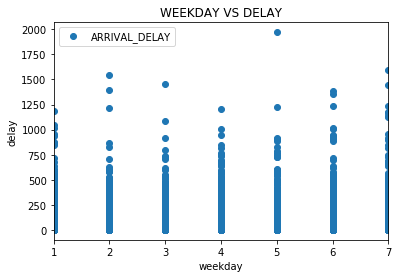

In [36]:
#Before performing Linear Regression, first checking correlation between day of the week and arrival delay.
flights_df.plot(x='DAY_OF_WEEK', y='ARRIVAL_DELAY', style='o')  
plt.title('WEEKDAY VS DELAY')  
plt.xlabel('weekday')  
plt.ylabel('delay')
plt.show()

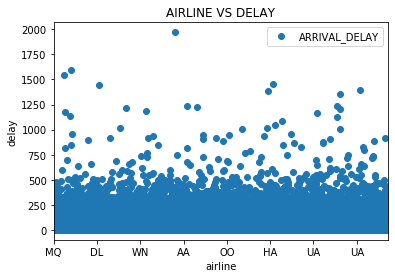

In [37]:
#Before performing Linear Regression, first checking correlation betweeb airline and arrival delay.
flights_df.plot(x='AIRLINE', y='ARRIVAL_DELAY', style='o')  
plt.title('AIRLINE VS DELAY')  
plt.xlabel('airline')  
plt.ylabel('delay')
plt.show()
##LINEAR REGRESSION CANNOT BE BERFORMED ON THAT PAIR BECAUSE AIRLINE IS NOT NUMERIC!

##Linear Regression for Day_Of_The_Week vs Arrival_Delay


In [38]:
##Linear Regression for Day of the week vs Arrival Delay
X = flights_df['DAY_OF_WEEK'].values.reshape(-1,1)
y = flights_df['ARRIVAL_DELAY'].values.reshape(-1,1)

#split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# build the model
model = LinearRegression()  
model.fit(X_train, y_train)

print(model.coef_)

[[0.37479551]]


In [39]:
#calculate the predictions of the linear regression model
y_pred = model.predict(X_test)

#build a new data frame with two columns, the actual values of the test data, 
#and the predictions of the model
df_compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_head = df_compare.head(25)
print(df_head)

    Actual  Predicted
0      1.0       31.7
1     86.0       30.6
2     10.0       31.0
3     13.0       29.9
4    111.0       29.9
5      6.0       32.1
6      7.0       31.0
7     13.0       29.9
8      2.0       29.9
9      7.0       31.4
10     0.0       32.1
11    26.0       29.9
12    12.0       31.0
13    32.0       31.4
14    19.0       30.6
15   573.0       31.7
16    86.0       29.9
17     6.0       31.0
18    11.0       29.9
19    64.0       32.1
20   116.0       30.2
21    48.0       29.9
22     2.0       31.4
23     6.0       30.2
24     9.0       30.2


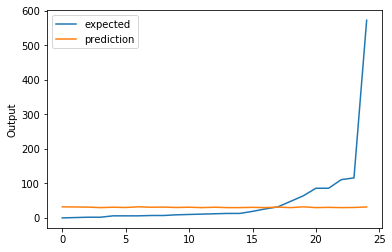

In [40]:
# Producing error Curves (regression Chart) for the linear rgression model, predicted vs actual..
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('Output')
    plt.legend()
    plt.show()
    
chart_regression(y_pred[:25].flatten(),y_test[:25],sort=True)


## Applying K-NN algorithm on the data to analyse and check if we can predict the flight delay based on day of the week

Our motive for applying K-NN on data is to dicover patterns of delays. For instance, if delays are indeed different everyday, every 2 days or in two differnt groups (weekday & weekend).

In [41]:
##Applying K-NN algorithm on the data to analyse and check if we can predict the flight delay based on day of the week

##Preparing the data
X = flights_df['DAY_OF_WEEK'].values.reshape(-1,1)
y = flights_df['ARRIVAL_DELAY'].values.reshape(-1,1)

#split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
##Scaling the features, i.e. Normalisation.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

##We can have a look at the error rate for different k values, but we will stop at 7 (days of the week)

#store rmse values for different k
rmse_val = [] 
k_val = []
for K in range(7):
    K = K+1
    k_val.append(K)
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)
    #fit the model
    pred=model.predict(X_test) 
    #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) 
    #calculate rmse
    rmse_val.append(error) 
    #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 54.086162065081325
RMSE value for k=  2 is: 54.67605113473219
RMSE value for k=  3 is: 52.91655611902105
RMSE value for k=  4 is: 51.7050632846165
RMSE value for k=  5 is: 63.927495413480834
RMSE value for k=  6 is: 59.46451059238956
RMSE value for k=  7 is: 57.09610171162481


Text(0.5, 0, 'K-Values')

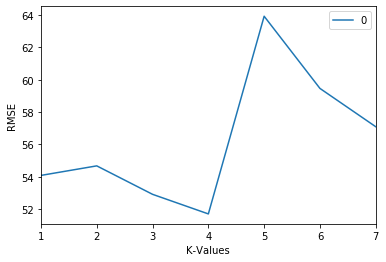

In [42]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val,k_val)
curve.plot()
plt.ylabel('RMSE')
plt.xlabel('K-Values')


### According to the previous curve, the K with the least RMSE value is 7 and thus shall be used, even if the difference is minimal.
------------

### Question B: Can we predict whether there will be a delay based on origin airport, airline and day of the week?

Here, we're going to train a model to predict whether a plane will depart early or late depending on day of the week, from which airport it's flying from and with which airline the flight is associated with.

To train our model we need necessary data. From our dataset, we'll gather the following:

* AIRLINE
* ORIGIN_AIRPORT
* DAY_OF_WEEK
* ARRIVAL_DELAY
* SECURITY_DELAY
* LATE_AIRCRAFT_DELAY

#### Preparing data

First, let's get a copy of raw _flights.cv_ data and keep only columns we need (as mentioned above).

In [43]:
required_columns = ['AIRLINE', 'ORIGIN_AIRPORT', 'DAY_OF_WEEK', 'ARRIVAL_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

flights_df = _flights_csv.copy()
flights_df = flights_df[required_columns]
print(f'Total rows: {flights_df.shape[0]:,}')
flights_df.head(10)

Total rows: 193,236


,AIRLINE,ORIGIN_AIRPORT,DAY_OF_WEEK,ARRIVAL_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
2,US,SFO,4,5.0,0.0,0.0
5,DL,SFO,4,8.0,0.0,0.0
14,DL,SEA,4,8.0,0.0,0.0
20,NK,LAS,4,6.0,0.0,0.0
21,AA,SEA,4,1.0,0.0,0.0
27,NK,MSP,4,25.0,0.0,0.0
29,AA,DEN,4,2.0,0.0,0.0
30,NK,PHX,4,43.0,0.0,0.0
33,DL,SLC,4,10.0,0.0,0.0
35,HA,LAS,4,15.0,0.0,0.0


We have some pieces of data that are empty. Let's drop all rows which have at least 1 null column.

In [44]:
# drop null values
flights_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print(f'Total rows: {flights_df.shape[0]:,}')
flights_df.head(10)

Total rows: 193,236


,AIRLINE,ORIGIN_AIRPORT,DAY_OF_WEEK,ARRIVAL_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
2,US,SFO,4,5.0,0.0,0.0
5,DL,SFO,4,8.0,0.0,0.0
14,DL,SEA,4,8.0,0.0,0.0
20,NK,LAS,4,6.0,0.0,0.0
21,AA,SEA,4,1.0,0.0,0.0
27,NK,MSP,4,25.0,0.0,0.0
29,AA,DEN,4,2.0,0.0,0.0
30,NK,PHX,4,43.0,0.0,0.0
33,DL,SLC,4,10.0,0.0,0.0
35,HA,LAS,4,15.0,0.0,0.0


Now, delays won't do us good being separate, so we're going to sum them together and put them into a new column simply called __DELAY__

In [45]:
flights_df['DELAY'] = flights_df['LATE_AIRCRAFT_DELAY'] + flights_df['ARRIVAL_DELAY'] + flights_df['SECURITY_DELAY']
# now we can safely drop previous tables
flights_df.drop(['LATE_AIRCRAFT_DELAY', 'ARRIVAL_DELAY', 'SECURITY_DELAY'], axis=1, errors='ignore', inplace=True)
flights_df.head(10)

,AIRLINE,ORIGIN_AIRPORT,DAY_OF_WEEK,DELAY
2,US,SFO,4,5.0
5,DL,SFO,4,8.0
14,DL,SEA,4,8.0
20,NK,LAS,4,6.0
21,AA,SEA,4,1.0
27,NK,MSP,4,25.0
29,AA,DEN,4,2.0
30,NK,PHX,4,43.0
33,DL,SLC,4,10.0
35,HA,LAS,4,15.0


We need to encode all textual data in order as it's easier to work with. Textual data here are __AIRLINE__ and __ORIGIN_AIRPORT__ columns.

In [46]:
# explicitly convert given types to string
flights_df['AIRLINE'] = flights_df['AIRLINE'].astype(str)
flights_df['ORIGIN_AIRPORT'] = flights_df['ORIGIN_AIRPORT'].astype(str)

flights_df_encoder = LabelEncoder()
flights_df = flights_df.apply(flights_df_encoder.fit_transform)

print(f'Total rows: {flights_df.shape[0]:,}')
flights_df.head(10)

Total rows: 193,236


,AIRLINE,ORIGIN_AIRPORT,DAY_OF_WEEK,DELAY
2,11,269,3,5
5,3,269,3,8
14,3,268,3,8
20,8,166,3,6
21,0,268,3,1
27,8,208,3,25
29,0,81,3,2
30,8,230,3,43
33,3,277,3,10
35,6,166,3,15


Now, the data is ready to be used for training!

#### Training Data

For this prediction, we're going to utilize neural networks library scikit comes with. 

Before we start, we need to split our existing dataset into training and test data. Training data will be used to train our model, and test data will be used to test the accuracy of our predictions. For our purposes, we'll use 80% of our data for training and the remaining 20% for testing.

In [47]:
flights_df_copy = flights_df.copy()

# we split our dataset into inputs (x) and output (y)
# df_x are the following inputs: AIRLINE, ORIGIN_AIRPORT and DAY_OF_WEEK
# df_y is the following output: DELAY
df_y = flights_df_copy['DELAY']
df_x = flights_df_copy.drop('DELAY', axis=1)

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size= 0.25, random_state=27)

print(f'Train Set Count: {x_train.shape[0]:,}')
print(f'Test Set Count: {x_test.shape[0]:,}')

Train Set Count: 144,927
Test Set Count: 48,309


In [48]:
nn = MLPClassifier(hidden_layer_sizes=(10, 15), 
                   max_iter=500, 
                   alpha=0.0001, 
                   solver='sgd',
                   learning_rate='adaptive',
                   random_state=21,
                   tol=0.000000001)

In [49]:
nn.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 15), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=21, shuffle=True, solver='sgd', tol=1e-09,
              validation_fraction=0.1, verbose=False, warm_start=False)

Now, we predict based on the test data we get.

In [50]:
predicted_outputs=nn.predict(x_test)

After that, we print out the predicted vs actual data.

In [51]:
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_outputs})
df_head = df_compare.head(10)

print(df_head)

        Actual  Predicted
35755       33          0
118084     100          0
5448         3          0
434211       0          0
119232      64          0
22686        7          0
460682      28          0
133432       8          0
135859      21          0
331034       3          0


In [52]:
# calculate prediction accuracy rate
print(f'Accuracy: {accuracy_score(y_test, predicted_outputs) * 100}%')

Accuracy: 5.36959986751951%
